In [216]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [224]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

## Perform API Calls

In [225]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url=f"{url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=4b33165d8136ef7687d9799ecdffc091&units=imperial&q=


In [226]:
city_list = cities
print(city_list)

['cape town', 'jamestown', 'rikitea', 'pevek', 'vilyuysk', 'bluff', 'punta arenas', 'colares', 'puerto ayora', 'kruisfontein', 'nador', 'albany', 'khatanga', 'hithadhoo', 'port hardy', 'bredasdorp', 'thompson', 'tessalit', 'port elizabeth', 'amderma', 'dudinka', 'salalah', 'sisimiut', 'kaeo', 'namibe', 'tasiilaq', 'arlit', 'verkhnetulomskiy', 'marcona', 'san andres', 'suao', 'pasni', 'middelkerke', 'atuona', 'gorontalo', 'salym', 'vaitupu', 'illoqqortoormiut', 'ushuaia', 'samarai', 'praia da vitoria', 'kapaa', 'mataura', 'butaritari', 'lolua', 'saint-philippe', 'fort nelson', 'rodrigues alves', 'hobart', 'yeppoon', 'dharchula', 'samusu', 'bambous virieux', 'sitka', 'cherskiy', 'hermanus', 'vaini', 'cuenca', 'yenagoa', 'jiexiu', 'busselton', 'hasaki', 'stornoway', 'tiksi', 'wanaka', 'yellowknife', 'matsanga', 'meulaboh', 'manavalakurichi', 'burnie', 'vardo', 'elizabeth city', 'nemuro', 'laguna', 'rudraprayag', 'kodiak', 'nagato', 'dingle', 'coalcoman', 'east london', 'trairi', 'taltal',

In [244]:
#set up lists to hold response info
lat = []
lon = []
temp = []
temp_max = []
humidity = []
clouds = []
wind = []
#country = []
date = []

# Loop through the list of cities and perform a request for data on each.
for city in city_list:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        #country.append(repsonse(int['sys']['country']))
        date.append(response["dt"])
    except: 
        #print(query_url + city)
        #print("City has no data")
        lat.append('NaN')
        lon.append('NaN')
        temp.append('NaN')
        temp_max.append('NaN')
        humidity.append('NaN')
        clouds.append('NaN')
        wind.append('NaN')
        #country.append('NaN')
        date.append('NaN')
    
# Get the temp, humidity, cloudiness and wind speed from the response
print(f"The Latitude information received is: {lat}")
print(f"The Longitude infromation received is: {lon}")
print(f"The Temperature information received is: {temp}")
print(f"The Max Temp information received is: {temp_max}")
print(f"The Humidity information received is: {humidity}")
print(f"The Cloudiness information received is: {clouds}")
print(f"The Wind Speed information received is: {wind}")
#print(f"The Country information received is: {country}")
print(f"The Date information received is: {date}")

The Latitude information received is: [-33.93, -33.21, -23.12, 69.7, 63.75, -23.58, -53.16, 38.8, -0.74, -34, 35.17, 42.65, 71.98, -0.6, 50.7, -34.53, 55.74, 20.2, 39.31, 'NaN', 69.41, 17.01, 66.94, -35.1, -15.19, 65.61, 18.74, 68.61, 'NaN', 13.32, 'NaN', 25.26, 51.19, -9.8, 0.54, 60.06, 'NaN', 'NaN', -54.81, -10.62, 38.73, 22.08, -46.19, 3.07, 'NaN', 45.36, 58.81, -7.74, -42.88, -23.13, 29.85, 'NaN', -20.34, 37.17, 68.75, -34.42, 15.34, 40.07, 4.92, 37.02, -33.64, 35.73, 'NaN', 71.64, -44.7, 62.45, 'NaN', 4.14, 8.13, -41.05, 39.62, 36.3, 43.32, 27.52, 30.29, 39.95, 34.35, 11, 'NaN', -33.02, -3.28, -25.41, 51.68, 77.48, 67.55, 63.84, -46.43, 29.19, -45.41, 68.05, 42.05, 'NaN', 49.28, 64, 70.95, 15.12, 59.36, 59.7, 36.08, 69.22, 67.67, 1.61, 38.68, 10.24, 69.49, 47.41, -20.01, -18.92, -33.85, -42.48, -16.78, -32.75, -33.59, 78.22, -25.54, 28.28, 65.28, 52.69, 37.72, -9.87, 5.33, 20.76, 62, 'NaN', 'NaN', 34.64, 'NaN', 30.04, 1.4, -38.31, 41.28, 'NaN', 30.68, 8.96, 47.44, 47.66, 28.66, 'N

In [245]:
# Create a data frame from cities, lat, temp, humidity, clouds and wind
weather_df = {
    "City": city_list,
    "Cloudiness": clouds,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lon": lon,
    "Max Temp": temp_max,
    "Temp": temp,
    "Wind": wind
}
weather_data = pd.DataFrame(weather_df)
weather_data.head()

,City,Cloudiness,Date,Humidity,Lat,Lon,Max Temp,Temp,Wind
0,cape town,20,1533686400,93,-33.93,18.42,41,41,3.36
1,jamestown,88,1533690718,87,-33.21,138.6,50.6,50.6,15.9
2,rikitea,24,1533690718,100,-23.12,-134.97,73.55,73.55,7.25
3,pevek,80,1533690718,100,69.7,170.27,36.47,36.47,11.88
4,vilyuysk,80,1533690719,81,63.75,121.63,64.28,64.28,3.6


In [264]:
weather_data.to_csv("Weather_Data_VS_Latitude.csv")

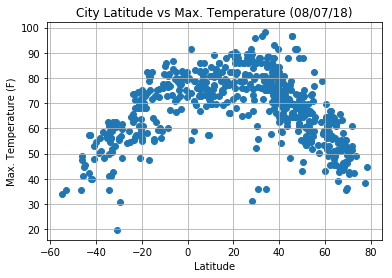

In [260]:
# Build a scatter plot for each data type.
# Temperature (F) vs. Latitude
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Max. Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeVSMaxTemp.png")

# Show plot
plt.show()

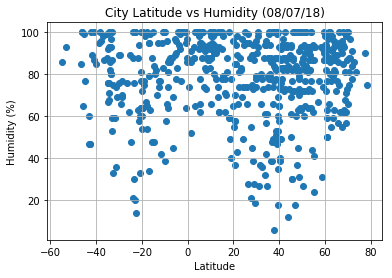

In [261]:
# Build a scatter plot for each data type.
# Humidity (%) vs. Latitude
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeVSHumidity.png")

# Show plot
plt.show()

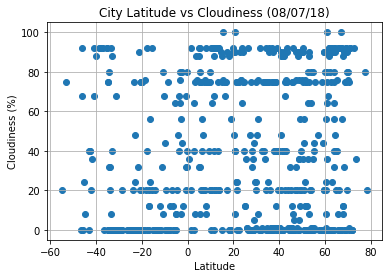

In [262]:
# Build a scatter plot for each data type.
# Cloudiness (%) vs. Latitude
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeVSCloudiness.png")

# Show plot
plt.show()

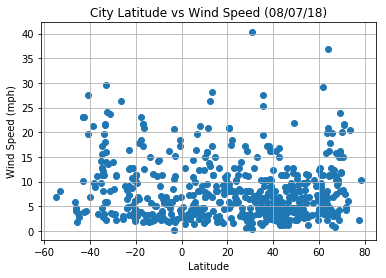

In [263]:
# Build a scatter plot for each data type.
# Wind Speed (mph) vs. Latitude
plt.scatter(weather_data["Lat"], weather_data["Wind"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeVSWindSpeed.png")

# Show plot
plt.show()